# Assignment 3 Social Media Scrapping

In [7]:
#installation of praw
!pip install praw

# Authentication to the reddit app

In [9]:
 # Importing the PRAW library for accessing Reddit's API.
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="Ia0rmMoI-ev93kH4-oZTlQ",
    client_secret="p-jaKML5ld332cgUYKHL4VbAnS6zFQ",
    user_agent=user_agent
)


In [10]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# Get Tesla Topic from your Subreddit
The "Tesla" subreddit channel will be use for this project

In [27]:
# Hot new rising topics
# Looping through hot submissions in the Bitcoin subreddit and printing relevant information.
headlines = set()
for submission in reddit.subreddit("Tesla").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))


r/TeslaMotors is the subreddit you're looking for
15qiyhk
dalkon
1691983573.0
26
0.87
https://www.reddit.com/r/teslamotors
0


In [31]:
# Collect unique submission titles from hot posts in the Tesla subreddit and print the count.
headlines = set()
for submission in reddit.subreddit("Tesla").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

35


In [32]:
#Create a dataframe from the scrapped data 
Tesla_df = pd.DataFrame(headlines)
Tesla_df.head()

,0
0,Sad day. Tesla's Lab on Long Island Burned to ...
1,Is currently possible to use the Tesla Turbine...
2,AC or DC? How Nikola Tesla Enabled George West...
3,This is what has been kept SECRET!!!! Read the...
4,Experimental realization of Zenneck surface wa...


In [33]:
# Retrieve the column names of the DataFrame Tesla_df
Tesla_df.columns

RangeIndex(start=0, stop=1, step=1)

In [34]:
 # Rename the column of the DataFrame Tesla_df to 'Titles'.
Tesla_df.columns = ['Titles']

In [35]:
# Display the first few rows of the DataFrame Tesla_df.
Tesla_df.head()

,Titles
0,Sad day. Tesla's Lab on Long Island Burned to ...
1,Is currently possible to use the Tesla Turbine...
2,AC or DC? How Nikola Tesla Enabled George West...
3,This is what has been kept SECRET!!!! Read the...
4,Experimental realization of Zenneck surface wa...


In [36]:
# Calculate the number of duplicated titles in the 'Titles' column of Tesla_df.
Tesla_df.Titles.duplicated().sum()

0

In [38]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
Tesla_df["Titles"]= Tesla_df["Titles"].apply(cleanTxt)

#Show the clean text
Tesla_df.head()

,Titles
0,Sad day. Tesla's Lab on Long Island Burned to ...
1,Is currently possible to use the Tesla Turbine...
2,AC or DC? How Nikola Tesla Enabled George West...
3,This is what has been kept SECRET!!!! Read the...
4,Experimental realization of Zenneck surface wa...


In [39]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
Tesla_df["Titles"]= Tesla_df["Titles"].apply(remove_emoji)

#Show the clean text
Tesla_df.head()

,Titles
0,Sad day. Tesla's Lab on Long Island Burned to ...
1,Is currently possible to use the Tesla Turbine...
2,AC or DC? How Nikola Tesla Enabled George West...
3,This is what has been kept SECRET!!!! Read the...
4,Experimental realization of Zenneck surface wa...


In [40]:
!pip install textblob

In [41]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [42]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tesla_df dataframe
Tesla_df['Subjectivity'] = Tesla_df['Titles'].apply(getSubjectivity)
Tesla_df['Polarity'] = Tesla_df['Titles'].apply(getPolarity)

#Now display data
Tesla_df.head()

,Titles,Subjectivity,Polarity
0,Sad day. Tesla's Lab on Long Island Burned to ...,0.70,-0.275000
1,Is currently possible to use the Tesla Turbine...,1.00,0.000000
2,AC or DC? How Nikola Tesla Enabled George West...,0.40,0.800000
3,This is what has been kept SECRET!!!! Read the...,0.55,-0.332031
4,Experimental realization of Zenneck surface wa...,0.40,0.100000


In [43]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
Tesla_df["Insight"] = Tesla_df["Polarity"].apply(getInsight)

Tesla_df.head()

,Titles,Subjectivity,Polarity,Insight
0,Sad day. Tesla's Lab on Long Island Burned to ...,0.70,-0.275000,Negative
1,Is currently possible to use the Tesla Turbine...,1.00,0.000000,Neutral
2,AC or DC? How Nikola Tesla Enabled George West...,0.40,0.800000,Positive
3,This is what has been kept SECRET!!!! Read the...,0.55,-0.332031,Negative
4,Experimental realization of Zenneck surface wa...,0.40,0.100000,Positive


# Data Visualisation

In [44]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

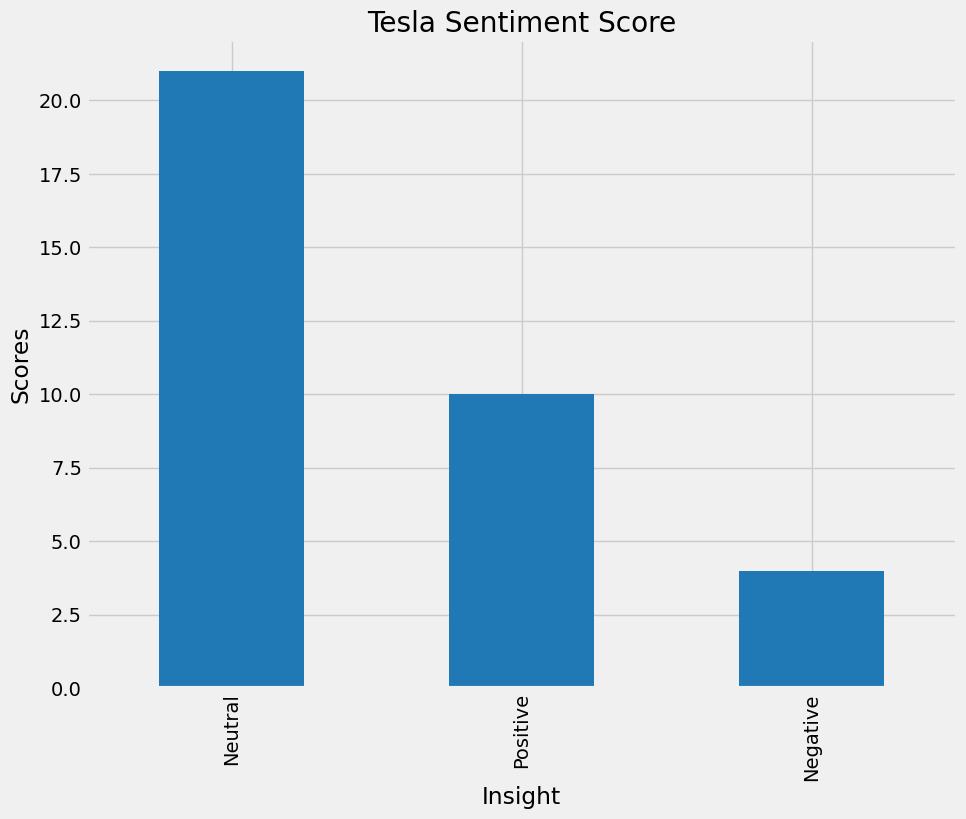

In [45]:
#Plot the values count of sentiment
plt.title("Tesla Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
Tesla_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Word cloud

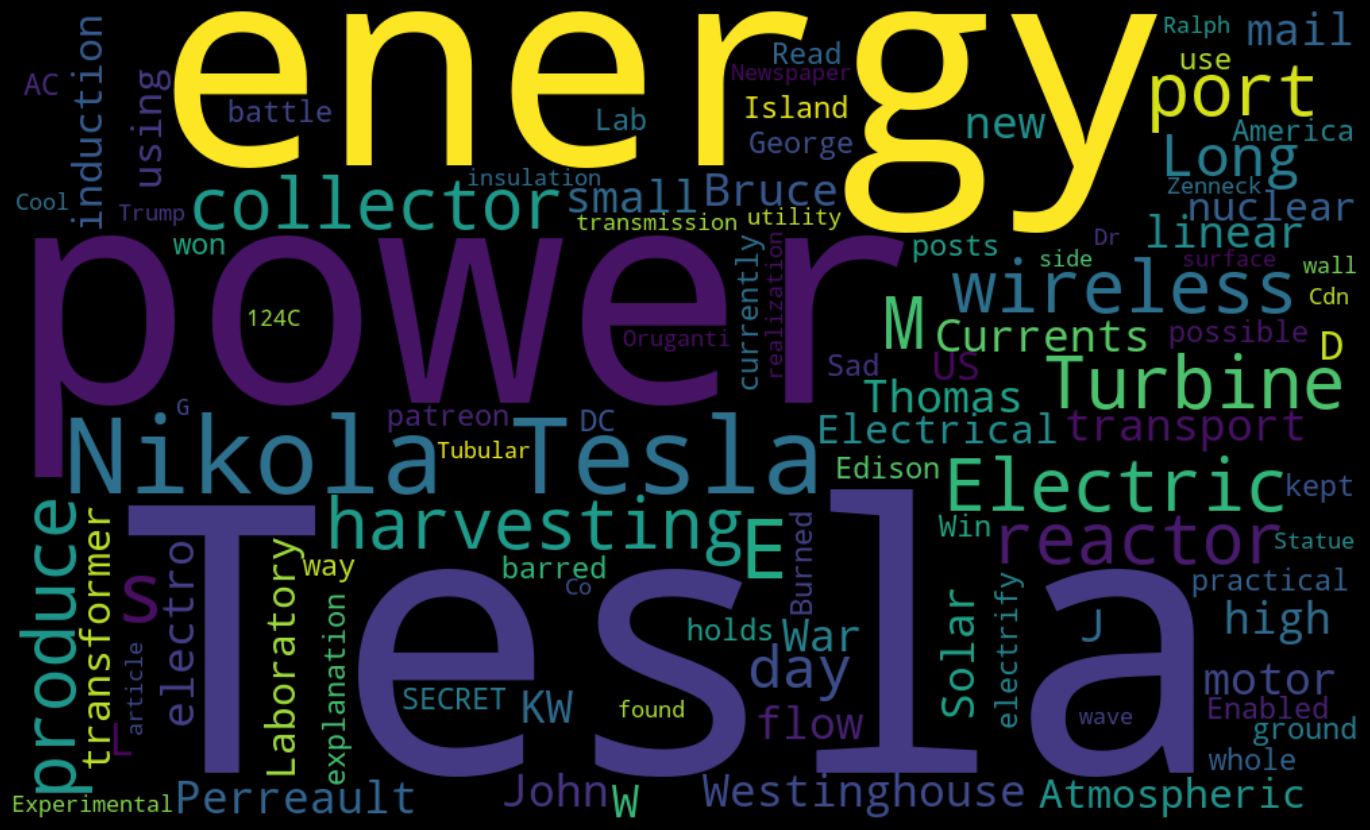

In [47]:
text = ' '.join( [twts for twts in Tesla_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
